***SHEET 5***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [28]:
#IMPORTS
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
#import requests as rq
import itertools
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from time import sleep
from sklearn.cluster import KMeans, DBSCAN

### UTILS

In [29]:
def kMeans(D,k,eps=0.01,mu=None,max_iter=20):
 d=D.shape[1]
 if mu is None:
  mu=np.random.rand(k,d)*(np.max(D,axis=0)-np.min(D,axis=0))+np.min(D,axis=0)
 if type(mu)==list:
  mu=np.array(mu)
 s=False
 g=0
 while not s:
  C=[np.argmin([np.linalg.norm(mu[j]-x)for j in range(k)if not any(np.isnan(mu[j]))])for x in D]
  n=np.zeros(mu.shape)
  s=True
  for i in range(k):
   J=[D[j]for j in range(len(D))if C[j]==i]
   if len(J)>0:
    n[i]=np.mean(J,axis=0)
   else:
    n[i]=np.random.rand(1,d)*(np.max(D,axis=0)-np.min(D,axis=0))+np.min(D,axis=0)
   if np.linalg.norm(mu[i]-n[i])>eps:
    s=False
  mu=n
  g+=1
  if g>=max_iter:
   s=True
 return C,mu

In [30]:
def DBSCAN (D, epsilon, minpts):
    
    def Density_Connected(x, k):
        for _,neighbor_index in enumerate(Ne(x, D, epsilon)):
            if id[neighbor_index] == 0 or id[neighbor_index] == -1:
                id[neighbor_index] = k
                if any((D[neighbor_index] == core_point).all() for core_point in core_points):
                    Density_Connected(D[neighbor_index], k)
    
    k = 0 # cluster id
    id  = np.array([-1]*len(D)) # cluster id
    core_points = []
    noise_points = []
    border_points = []

    for index, point in enumerate(D):
        neighborhood = Ne(point, D, epsilon)
        if len(neighborhood) >= minpts:
            id[index]=0
            core_points.append(point)
    index_in_list=0

    for index, point in enumerate(D):
        if id[index] == 0:
            k += 1
            id[index] = k
            Density_Connected(point, k)
        index_in_list+=1

    clusters = {i+1: {tuple(D[j]) for j in range(len(D)) if id[j] == i+1} for i in range(k)}
    noise_points = [tuple(D[j]) for j in range(len(D)) if id[j] == -1]
    border_points = {tuple(D[j]) for j in range(len(D)) if any((D[j] == core_point).all() for core_point in core_points) and any((D[j] == noise_point).all() for noise_point in noise_points)}  
    return clusters, core_points, noise_points, border_points, id

def Ne (xi, D, epsilon):
    ne = []
    for point_index, xj in enumerate(D):
        if (np.linalg.norm(xi-xj) <= epsilon):
            ne.append(point_index)
    return ne 


### EXERCISE 1

#### EXERCISE 1.1

In [31]:

def getDistances(A):  
    pairwise_distances = pdist(A, metric='euclidean')
    distance_matrix = squareform(pairwise_distances)
    return distance_matrix


#### EXERCISE 1.2

In [32]:
def getW(D,U,V):
    acum_sum=0
    for _,index_u in enumerate(U):
        for _,index_v in enumerate(V):
            acum_sum+=(D[index_u][index_v])
    return acum_sum


#### EXERCISE 1.3

In [33]:
def getWIn(D, C):
    n = len(C)
    acum_sum = 0
    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:
                acum_sum += D[i][j]
    return acum_sum/2

In [34]:
def getWOut(D, C):
    n = len(C)
    acum_sum = 0
    for i in range(n):
        for j in range(n):
            if C[i] != C[j]:
                acum_sum += D[i][j]
    return acum_sum/2

In [35]:
def getNIn(C):
    n = len(C)
    acum_sum = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                if C[i] == C[j]:
                    acum_sum += 1
    return acum_sum/2
    

In [36]:
def getNOut(C):
    n = len(C)
    acum_sum = 0
    for i in range(n):
        for j in range(n):
            if i != j:
                if C[i] != C[j]:
                    acum_sum += 1
    return acum_sum/2

In [37]:
# Test weight

import pandas as pd_test
import numpy as np_test

dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
print(type(A_Iris_Test))
D_Iris_Test = getDistances(A_Iris_Test)
clusters = np.where(C_Iris_Test == 'setosa')[0]
C2 = np.where(C_Iris_Test == 'versicolor')[0]
C3 = np.where(C_Iris_Test == 'virginica')[0]
CList = [clusters, C2, C3]

print ("\nTest Weight Measures\n------------------")
expectedW = {
    (0,1): 8246,
    (0,2): 12056,
    (1,2): 4606
}
wSummary = "W: "
wFailed = False
for i in range(3):
    for j in range(i):
        p1 = (i,j)
        p2 = (j,i)
        W1 = np_test.round(getW(D_Iris_Test, CList[i], CList[j]))
        W2 = np_test.round(getW(D_Iris_Test, CList[j], CList[i]))
        if W1 != W2:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tasymmetry of W: " + str(W1) + " != " + str(W2)
            wFailed = True
        
        if W1 != expectedW[p2]:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tunexpected value of W: " + str(W1) + " instead of expected " + str(expectedW[p2])
            wFailed = True
if not wFailed:
    wSummary += "ok"
print(wSummary)
expectedWIn = 3518
expectedWOut = 24908
expectedNIn = 3675
expectedNOut = 7500
print("WIn:", "ok" if np_test.abs(np_test.round(getWIn(D_Iris_Test, C_Iris_Test)) - expectedWIn) < 2 else "failed")
print("WOut:", "ok" if np_test.abs(np_test.round(getWOut(D_Iris_Test, C_Iris_Test)) - expectedWOut) < 2 else "failed")
print("NIn:", "ok" if getNIn(C_Iris_Test) == 3675 else "failed")
print("NOut:", "ok" if getNOut(C_Iris_Test) == 7500 else "failed")

<class 'pandas.core.frame.DataFrame'>

Test Weight Measures
------------------
W: ok
WIn: ok
WOut: ok
NIn: ok
NOut: ok


#### EXERCISE 1.4

In [38]:
def getBetaCV(A,C):
    D=getDistances(A)
    W_in=getWIn(D,C)
    N_in=getNIn(C)
    W_out=getWOut(D,C)
    N_out=getNOut(C)
    betaCV_value= (W_in/N_in)/(W_out/N_out)
    return betaCV_value


In [39]:
def getCIndex(A,C):
    D=getDistances(A)
    W_in=getWIn(D,C)
    N_in=getNIn(C)
    values=[]
    rows,columns=D.shape
    
    for index_row in range(rows):
        for index_column in range(columns):
            if index_row<index_column:
                values.append(D[index_row][index_column])
    values_order_upward=np.sort(values)
    values_order_downward=values_order_upward[::-1]
    W_min=0
    W_max=0
    for index in range(int(N_in)):
        W_min+=values_order_upward[index]
        W_max+=values_order_downward[index]
    C_index=(W_in-W_min)/(W_max-W_min)
    return C_index


In [40]:
def getNormalizedCut(A, C):
    k=len(set(C))
    D=getDistances(A)
    categories=np.unique(C)
    normalizedCut=0
    index_groups = [[] for _ in range(k)]
    for index in range(len(C)):
        for index_category,category in enumerate(categories):
            if(C[index]==category):
                index_groups[index_category].append(index)

    for index_cluster in range(len(index_groups)):
        rest_index=[]
        for index_rest in range (len(index_groups)):
            if (index_cluster!=index_rest):
                rest_index=rest_index+index_groups[index_rest]
        value_up=getW(D,index_groups[index_cluster],rest_index)
        value_down=getW(D,index_groups[index_cluster],index_groups[index_cluster])+value_up
        normalizedCut+=(value_up/value_down)
    return normalizedCut

In [41]:
def getDunn(A,C):
    D = getDistances(A)
    n = len(C)
    min_out = float('inf')
    max_in = 0
    for i in range(n):
        for j in range(n):
            if C[i] != C[j]:
                out_distance = D[i][j]
                if out_distance < min_out:
                    min_out = out_distance
                    
    for i in range(n):
        for j in range(n):
            if C[i] == C[j]:
                in_distance = D[i][j]
                if in_distance > max_in:
                    max_in = in_distance
    dunn = min_out / max_in
    return dunn

In [42]:
def getDaviesBouldin(A, C):
    k=len(set(C))
    categories=np.unique(C)
    daviesBouldin=[]
    index_groups = [[] for _ in range(k)]

    for index in range(len(C)):
        for index_category,category in enumerate(categories):
            if(C[index]==category):
                index_groups[index_category].append(np.array(A)[index])

    for index_cluster,cluster in enumerate(index_groups):
        daviesBouldin_for_cluster=[]
        desv_i=np.std(cluster,axis=0)
        desv_i= np.linalg.norm(desv_i)
        mean_i=np.mean(cluster,axis=0)

        for index_cluster_rest,cluster_rest in enumerate(index_groups):
            daviesBouldin_value=0
            if(index_cluster!=index_cluster_rest):
                desv_j=np.std(cluster_rest,axis=0)
                desv_j= np.linalg.norm(desv_j)
                mean_j=np.mean(cluster_rest,axis=0)
                distance_means=np.linalg.norm(mean_i-mean_j)
                daviesBouldin_value+=(desv_i+desv_j)/distance_means
                daviesBouldin_for_cluster.append(daviesBouldin_value)
        daviesBouldin.append(max(daviesBouldin_for_cluster))
        
    daviesBouldin_final=sum(daviesBouldin)/k
    return daviesBouldin_final  

In [43]:
def getSilhouette(A,C):
    k=len(set(C))
    categories=np.unique(C)
    SC_list=[]
    index_groups = [[] for _ in range(k)]

    for index in range(len(C)):
        for index_category,category in enumerate(categories):
            if(C[index]==category):
                index_groups[index_category].append(np.array(A)[index])
    
    for principal_index,principal_cluster in enumerate(index_groups):
        for i,selected_point in enumerate(principal_cluster):
            Si_value=0
            difference_different_cluster=[]

            for analized_index,cluster_analized in enumerate(index_groups):
                if (principal_index==analized_index):
                    distance_points_same_cluster=0
                    for j,another_point in enumerate(principal_cluster):
                        if(i!=j):
                            distance_points_same_cluster+=np.linalg.norm(selected_point-another_point)
                        if((len(principal_cluster))!=1):
                            mean_diference_same_cluster=distance_points_same_cluster/(len(principal_cluster)-1)
                        else:
                            mean_diference_same_cluster=0
                else:
                    distance_points_different_cluster=0
                    for j,another_point in enumerate(cluster_analized):
                        distance_points_different_cluster+=np.linalg.norm(selected_point-another_point)
                    mean_diference_different_cluster=distance_points_different_cluster/(len(principal_cluster))
                    difference_different_cluster.append(mean_diference_different_cluster)

            Si_value=(min(difference_different_cluster)-mean_diference_same_cluster)/(max([min(difference_different_cluster),mean_diference_same_cluster]))
            SC_list.append(Si_value)
            
    SC=(sum(SC_list)/len(SC_list))
    return(SC)

In [44]:
def getMetric(A, C, metric):
    if metric == "beta":
        return getBetaCV(A, C)
    elif metric == "cindex":
        return getCIndex(A, C)
    elif metric == "nc":
        return getNormalizedCut(A, C)
    elif metric == "dunn":
        return getDunn(A, C)
    elif metric == "db":
        return getDaviesBouldin(A, C)
    elif metric == "sil":
        return getSilhouette(A, C)
    else:
        return "metrica invalida"

In [45]:
# Test weights
import pandas as pd_test
import numpy as np_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)

# Test metrics
print ("\nTest Metrics\n------------------")
expected = {
    "beta": 0.2882861014913346,
    "cindex": 0.046803774122703735,
    "nc": 2.6150343040385264,
    "dunn": 0.05848053214719304,
    "db": 0.8445815484442534,
    "sil": 0.5032506980665507
}
for metric in expected:
    e = np.round(expected[metric], 2)
    a = getMetric(A_Iris_Test, C_Iris_Test, metric)
    a = np.round(a, 2) if not a is None else None
    print(metric + ":\t", "ok" if e == a else "failed. Expected " + str(e) + " but saw " + str(a))


Test Metrics
------------------


beta:	 ok
cindex:	 ok
nc:	 ok
dunn:	 ok
db:	 ok
sil:	 ok


### EXERCISE 2

#### EXERCISE 2.1

In [46]:
# plot metrics for kmeans and dbscan 

def plotMetrics(D, l, kmeans_eps, dbscan_configs):
    D = pd.DataFrame(D)
    D = D.values
    l = 100 
    metrics = ["beta", "cindex", "nc", "dunn", "db", "sil"]
    
    k_values = [2, 3, 4, 5]
    kmeans_metrics = {m: [] for m in metrics}
    dbscan_metrics = {m: [] for m in metrics}
    for i in range(l):
        for k in range(2, 6):
            C, _ = kMeans(D, k, kmeans_eps)
            for m in metrics:
                kmeans_metrics[m].append(getMetric(D, C, m))
        for e, m in dbscan_configs:
            print(e,m)
            _, _, _, _, C = DBSCAN(D, e, m)
            for m in metrics:
                dbscan_metrics[m].append(getMetric(D, C, m))
    
    for i, m in enumerate(metrics):
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.set_title(m)

        # box plots for kmeans
        ax.boxplot([kmeans_metrics[m][i:i+4] for i in range(0, len(kmeans_metrics[m]), 4)], positions=k_values, widths=0.6, patch_artist=True, boxprops=dict(facecolor="lightblue"))

        # plot horizontal lines for dbscan metrics
        for e, m in dbscan_configs:
            ax.axhline(y=getMetric(D, C, m), color="orange", linestyle="--", label="DBSCAN " + str(e) + " " + m)

        ax.legend()
        ax.set_xticks(k_values)
        ax.set_xticklabels(k_values)
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        

In [49]:
def plotMetrics1(D, l, kmeans_eps, dbscan_configs):
    print("PLOT METRICS 1")
    D = pd.DataFrame(D)
    D = D.values
    l = 10
    metrics = ["beta", "cindex", "nc", "dunn", "db", "sil"]
    k_values = [2, 3, 4, 5]
    kmeans_metrics = {metric: {k: [] for k in k_values} for metric in metrics}
    dbscan_metrics = {metric: [] for metric in metrics}

    for iteration in tqdm(range(l),desc="Iteraciones"):
        for k_value in k_values:
            kmeans = KMeans(n_clusters=k_value, tol=kmeans_eps)
            C = kmeans.fit_predict(D)
            for metric in metrics:
                kmeans_metrics[metric][k_value].append(getMetric(D, C, metric))
        for min_pts,e in dbscan_configs:
            _,_,_,_, C = DBSCAN(D, e, min_pts)
            for index,metric in enumerate(metrics):
                dbscan_metrics[metric].append(getMetric(D, C, metric))
    
    positions_of_boxplot = [[len(k_values) * 0.5 / len(k_values) * (i + 1) + 0.2 * i] for i in range(len(k_values))]

    fig, axs = plt.subplots(3, 2, figsize=(8, 8))
    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        axs[row, col].set_title(f"Kmeans - Metric: {metric}")
        for position, k_value in enumerate(k_values):
            axs[row, col].boxplot(kmeans_metrics[metric][k_value], positions=positions_of_boxplot[position])
        axs[row, col].set_xticks(range(1, len(k_values) + 1))
        axs[row, col].set_xticklabels(k_values)
    plt.tight_layout()
    plt.show()  

PLOT METRICS 1


Iteraciones: 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]


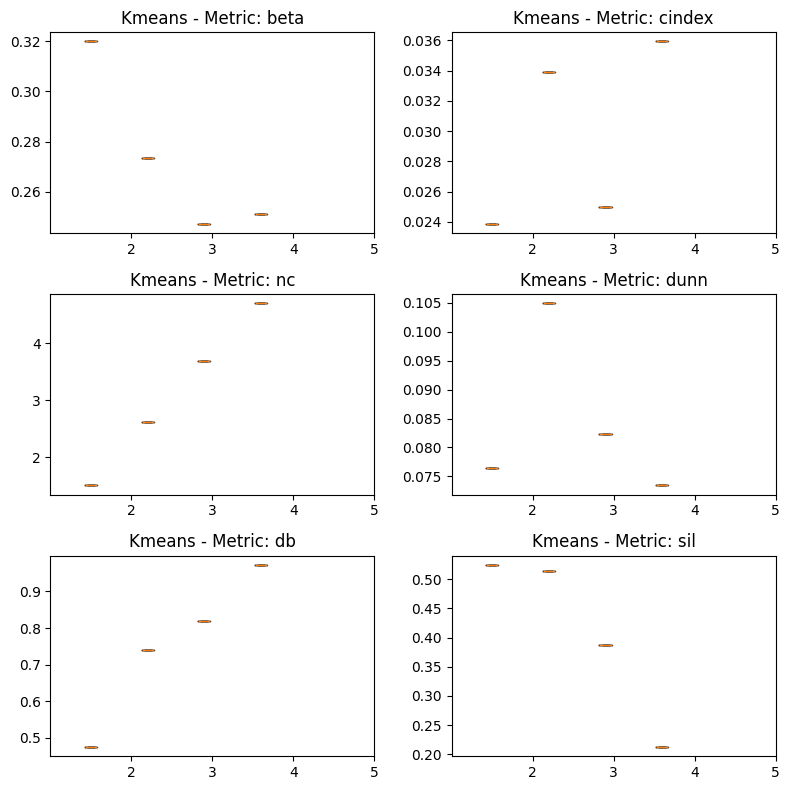

In [50]:
archivos = ['iris.csv','delayedflights-small.csv','Mall_Customers.csv']
archivos = ['Mall_Customers.csv']

#DBscan
minpts_values = [2,4,6]
epsilon_values = [0.2,0.8,0.5]
parameter_combinations = list(itertools.product(minpts_values, epsilon_values))


#Iris
iris_frame_dowloaded = pd.read_csv('iris.csv')
iris_frame_dowloaded.drop(columns=iris_frame_dowloaded.select_dtypes(exclude='number').columns, inplace=True)
plotMetrics1(iris_frame_dowloaded, 10, 0.01, parameter_combinations)